In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df=df[["v1","v2"]]

In [3]:
df.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [4]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [6]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
import nltk
from nltk.corpus import stopwords  
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kalli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))
 
# Function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
 
# Apply function to the text column
df['no_stopwords'] = df['message'].apply(remove_stopwords)
df.head()

,label,message,no_stopwords
0,0,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g..."
1,0,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah n't think goes usf , lives around though"


In [9]:
import re
import string
nltk.download('punkt')
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).split()

df['no_punctuation'] = df['no_stopwords'].apply(remove_punctuation)
#

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df.head()

,label,message,no_stopwords,no_punctuation
0,0,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...,"[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah n't think goes usf , lives around though","[Nah, nt, think, goes, usf, lives, around, tho..."


In [11]:
df1=df[df["label"]==0]
df2=df[df["label"]==1]

In [12]:
list1 = [item for sublist in df1['no_punctuation'] for item in sublist]
list2 = [item for sublist in df2['no_punctuation'] for item in sublist]

In [13]:
from collections import Counter
word_count_ham=Counter(list2)
word_count_spam=Counter(list1)



In [14]:
word_count_ham.most_common(10)

[('call', 188),
 ('2', 176),
 ('Call', 138),
 ('4', 123),
 ('FREE', 115),
 ('ur', 107),
 ('U', 97),
 ('mobile', 95),
 ('claim', 78),
 ('Txt', 75)]

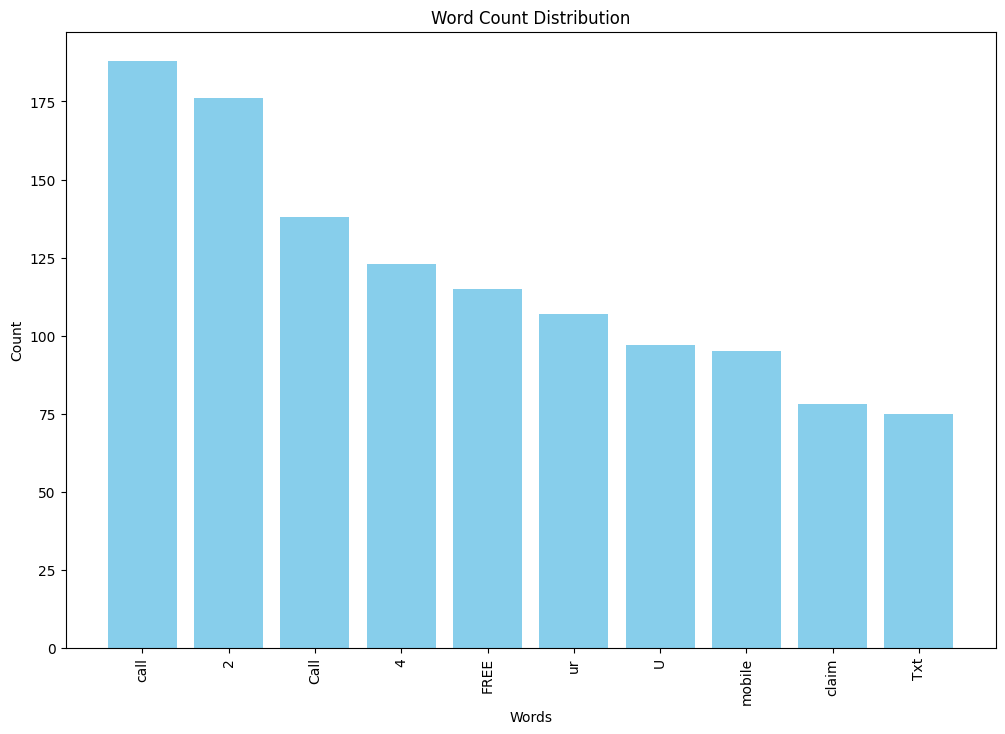

In [15]:
word_counts_df = pd.DataFrame(word_count_ham.items(), columns=['Word', 'Count'])

# Sort DataFrame by count
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(word_counts_df['Word'][:10], word_counts_df['Count'][:10], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Count Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

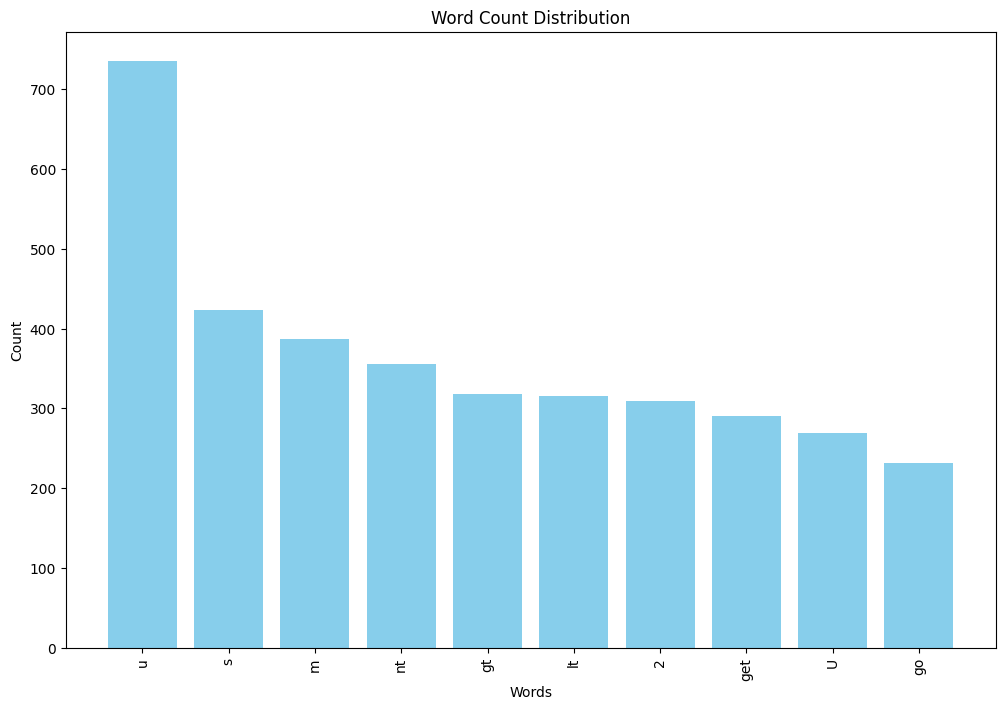

In [16]:
word_counts_df = pd.DataFrame(word_count_spam.items(), columns=['Word', 'Count'])

# Sort DataFrame by count
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(word_counts_df['Word'][:10], word_counts_df['Count'][:10], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Count Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
#bigrams
from nltk import bigrams

def find_most_common_bigrams(tokenized_list):
    bigram_list = list(bigrams(tokenized_list))
    bigram_counts = Counter(bigram_list)
    return bigram_counts.most_common(10)

most_common_bigrams_class_1 = find_most_common_bigrams(list1)
most_common_bigrams_class_2 = find_most_common_bigrams(list2)

print("10 Most Common Bigrams in Spam:")
for bigram, freq in most_common_bigrams_class_1:
    print(f"{bigram}: {freq}")

print("\n10 Most Common Bigrams in Ham:")
for bigram, freq in most_common_bigrams_class_2:
    print(f"{bigram}: {freq}")

10 Most Common Bigrams in Spam:
('lt', 'gt'): 276
('gon', 'na'): 57
('ca', 'nt'): 52
('call', 'later'): 50
('ll', 'call'): 44
('Sorry', 'll'): 39
('wan', '2'): 31
('let', 'know'): 29
('r', 'u'): 25
('lt', 'DECIMAL'): 23

10 Most Common Bigrams in Ham:
('Please', 'call'): 26
('prize', 'GUARANTEED'): 21
('GUARANTEED', 'Call'): 21
('å£1000', 'cash'): 19
('await', 'collection'): 19
('land', 'line'): 18
('every', 'week'): 18
('C', 's'): 17
('2', 'claim'): 17
('contact', 'U'): 17


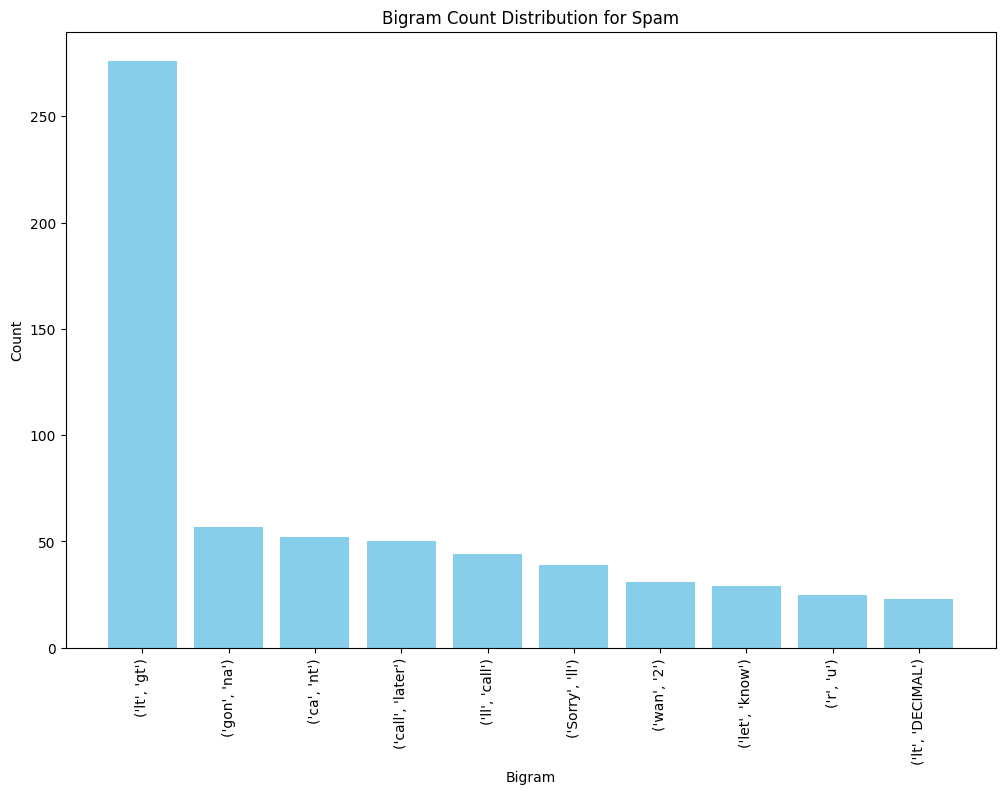

In [18]:
#plot the bigrams
bigram_counts_df = pd.DataFrame(most_common_bigrams_class_1, columns=['Bigram', 'Count'])
bigram_counts_df = bigram_counts_df.sort_values(by='Count', ascending=False)
bigram_counts_df
#convert datatype of bigrams to string
bigram_counts_df['Bigram'] = bigram_counts_df['Bigram'].apply(str)

#subplots for spam and ham
plt.figure(figsize=(12, 8))
plt.bar(bigram_counts_df['Bigram'], bigram_counts_df['Count'], color='skyblue')
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Bigram Count Distribution for Spam')
plt.xticks(rotation=90)
plt.show()


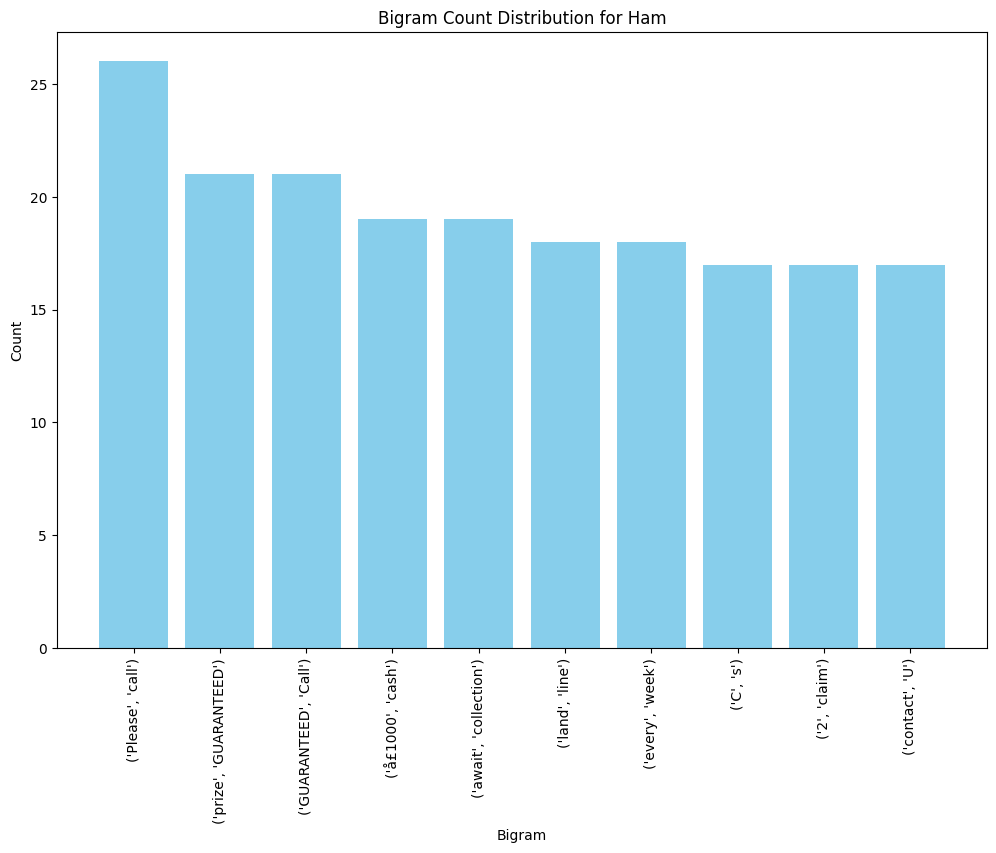

In [19]:
#plot the bigrams
bigram_counts_df = pd.DataFrame(most_common_bigrams_class_2, columns=['Bigram', 'Count'])
bigram_counts_df = bigram_counts_df.sort_values(by='Count', ascending=False)
bigram_counts_df
#convert datatype of bigrams to string
bigram_counts_df['Bigram'] = bigram_counts_df['Bigram'].apply(str)

#subplots for spam and ham
plt.figure(figsize=(12, 8))
plt.bar(bigram_counts_df['Bigram'], bigram_counts_df['Count'], color='skyblue')
plt.xlabel('Bigram')
plt.ylabel('Count')
plt.title('Bigram Count Distribution for Ham')
plt.xticks(rotation=90)
plt.show()

In [20]:
#trigrams
from nltk.util import trigrams


def find_most_common_trigrams(tokenized_list):
    bigram_list = list(trigrams(tokenized_list))
    bigram_counts = Counter(bigram_list)
    return bigram_counts.most_common(10)

most_common_trigrams_class_1 = find_most_common_trigrams(list1)
most_common_trigrams_class_2 = find_most_common_trigrams(list2)

print("10 Most Common Trigrams in Spam:")
for bigram, freq in most_common_bigrams_class_1:
    print(f"{bigram}: {freq}")

print("\n10 Most Common Trigrams in Ham:")
for bigram, freq in most_common_bigrams_class_2:
    print(f"{bigram}: {freq}")

10 Most Common Trigrams in Spam:
('lt', 'gt'): 276
('gon', 'na'): 57
('ca', 'nt'): 52
('call', 'later'): 50
('ll', 'call'): 44
('Sorry', 'll'): 39
('wan', '2'): 31
('let', 'know'): 29
('r', 'u'): 25
('lt', 'DECIMAL'): 23

10 Most Common Trigrams in Ham:
('Please', 'call'): 26
('prize', 'GUARANTEED'): 21
('GUARANTEED', 'Call'): 21
('å£1000', 'cash'): 19
('await', 'collection'): 19
('land', 'line'): 18
('every', 'week'): 18
('C', 's'): 17
('2', 'claim'): 17
('contact', 'U'): 17


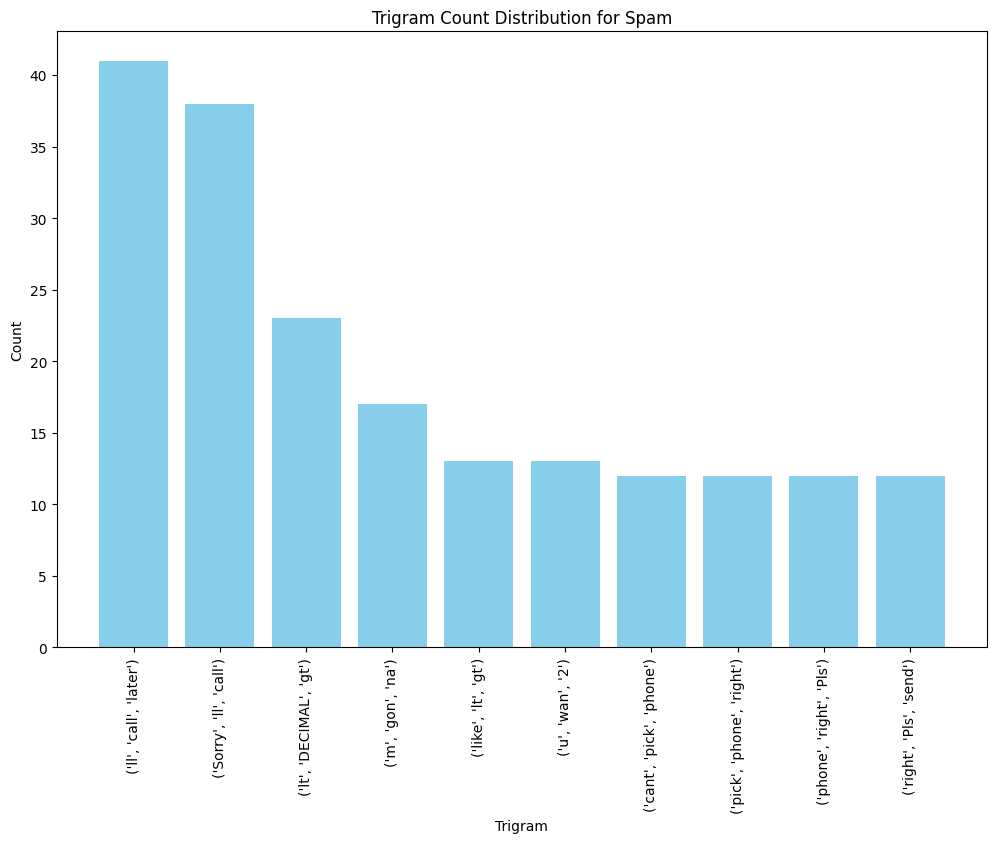

In [21]:
#plot the bigrams
trigrams_counts_df = pd.DataFrame(most_common_trigrams_class_1, columns=['Trigram', 'Count'])
trigrams_counts_df = trigrams_counts_df.sort_values(by='Count', ascending=False)
trigrams_counts_df
#convert datatype of bigrams to string
trigrams_counts_df['Trigram'] = trigrams_counts_df['Trigram'].apply(str)

#subplots for spam and ham
plt.figure(figsize=(12, 8))
plt.bar(trigrams_counts_df['Trigram'], trigrams_counts_df['Count'], color='skyblue')
plt.xlabel('Trigram')
plt.ylabel('Count')
plt.title('Trigram Count Distribution for Spam')
plt.xticks(rotation=90)
plt.show()

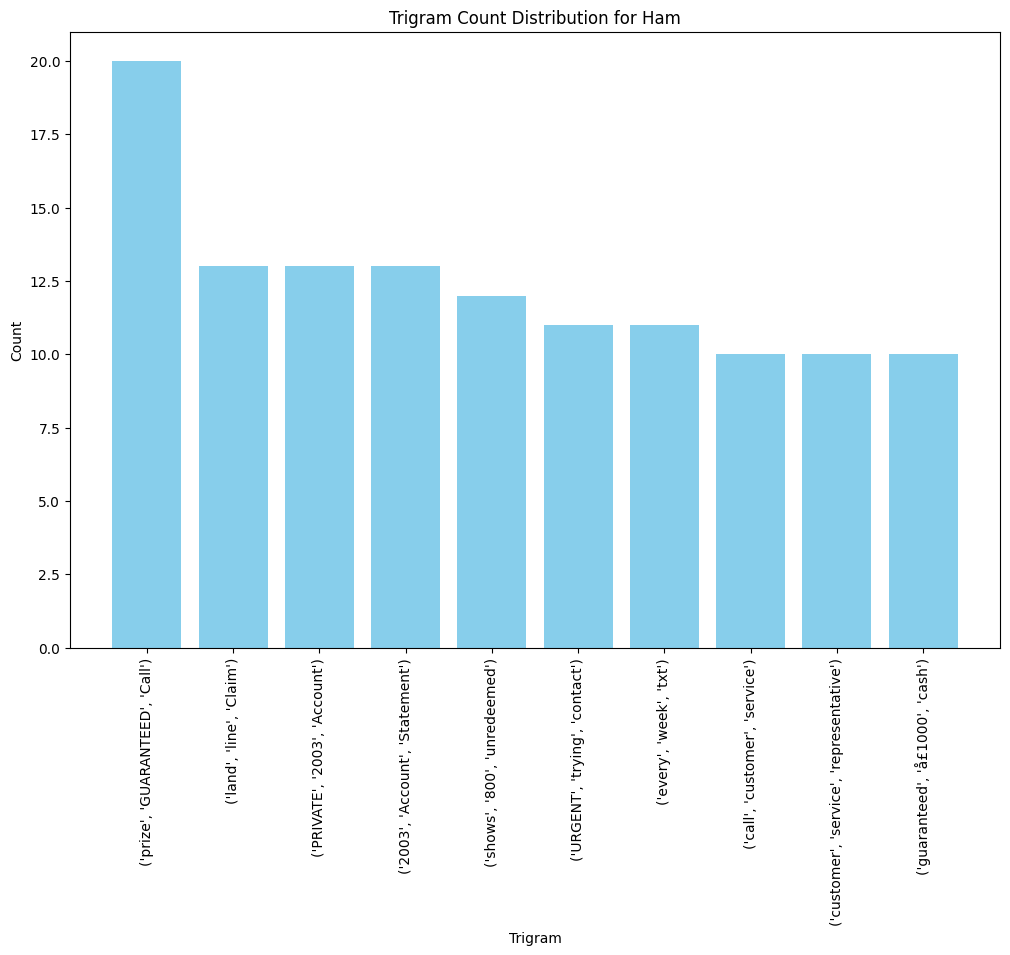

In [22]:
#plot the bigrams
trigrams_counts_df = pd.DataFrame(most_common_trigrams_class_2, columns=['Trigram', 'Count'])
trigrams_counts_df = trigrams_counts_df.sort_values(by='Count', ascending=False)
trigrams_counts_df
#convert datatype of bigrams to string
trigrams_counts_df['Trigram'] = trigrams_counts_df['Trigram'].apply(str)

#subplots for spam and ham
plt.figure(figsize=(12, 8))
plt.bar(trigrams_counts_df['Trigram'], trigrams_counts_df['Count'], color='skyblue')
plt.xlabel('Trigram')
plt.ylabel('Count')
plt.title('Trigram Count Distribution for Ham')
plt.xticks(rotation=90)
plt.show()

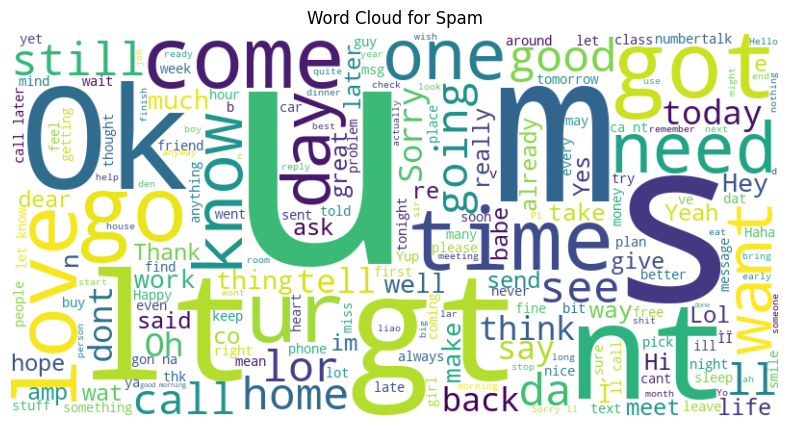

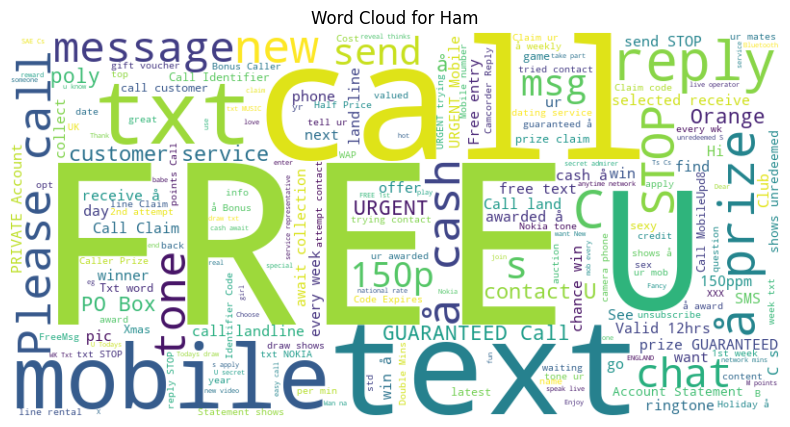

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(filtered_tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(list1, "Word Cloud for Spam")
generate_wordcloud(list2, "Word Cloud for Ham")

In [24]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], random_state=1,test_size=0.2)

count_vector = CountVectorizer()
count_vector.fit(X_train)
X_train_counts = count_vector.transform(X_train)
X_test_counts = count_vector.transform(X_test)
X_train_counts=X_train_counts.toarray()
X_test_counts=X_test_counts.toarray()
#give dataframe with feature names
word_freq_df = pd.DataFrame(X_train_counts, columns=count_vector.get_feature_names_out())
word_freq_df.head()


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ì_,ìä,ìï,ó_,û_,û_thanks,ûªve,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score

model = MultinomialNB()
model.fit(X_train_counts, y_train)
predictions = model.predict(X_test_counts)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))

Accuracy:  0.9847533632286996
F1 Score:  0.9386281588447654
